In [ ]:
#%%
# Importing necessary libraries
import pandas as pd
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
#1 Import Dataset
data = pd.read_csv("/content/archive.zip")

In [ ]:
for column in ['Brand', 'Model', 'Country', 'Condition', 'Fuel_Type', 'Drivetrain', 'Transmission', 'Popularity', 'Market_Demand', 'Modification']:
  for value in data[column].unique():
    print(value)

Nissan
McLaren
Chevrolet
Bugatti
BMW
Porsche
Aston Martin
Lamborghini
Ferrari
Ford
720S
911 Turbo S
M4 Competition
Chiron
GT-R
Mustang GT
DBS
Huracan
Corvette Z06
488 GTB
Asia
Europe
USA
used
new
salvage
restored
Diesel
Electric
Petrol
RWD
FWD
AWD
Automatic
DCT
CVT
Manual
Low
High
Medium
Medium
Low
High
V-Spec
nan
Nismo
Supercharged
GT
Turbo
Track Edition
Sport
RS


In [ ]:
#2 Display first 10 rows
data.head(10)

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,...,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
0,Nissan,720S,2006,Asia,used,3.7,420,705,1785,238,...,96664,Low,2,4,Medium,13410,5000,11.309352,11.479007,V-Spec
1,McLaren,911 Turbo S,2009,Europe,new,5.3,1104,766,992,386,...,159630,High,2,2,Medium,10795,1000,12.639334,11.980620,NaN
2,Chevrolet,M4 Competition,2009,USA,new,5.5,153,1573,2022,397,...,111496,High,1,2,Low,1716,20000,12.948902,11.621753,NaN
3,Bugatti,Chiron,1982,Asia,used,5.4,544,1009,1091,151,...,217228,High,2,4,Medium,11618,20000,11.725542,12.288707,NaN
4,Nissan,Chiron,2022,Europe,new,2.4,980,693,1232,385,...,150318,Low,3,2,Medium,11324,100000,11.229289,11.920515,NaN
5,BMW,GT-R,1986,Europe,new,5.4,1091,632,2135,341,...,228779,High,2,3,Medium,5274,200,13.077665,12.340516,NaN
6,Porsche,720S,1988,Asia,new,4.2,810,1222,2130,245,...,222953,Medium,4,3,Medium,5645,5000,12.895287,12.314721,Nismo
7,Nissan,720S,2020,USA,new,7.4,1189,184,1526,185,...,202882,High,2,4,Medium,12037,50,11.804131,12.220385,V-Spec
8,Chevrolet,Mustang GT,2021,Europe,new,7.4,230,302,1885,245,...,47481,Medium,1,2,Low,3899,1000,12.409679,10.768106,NaN
9,Bugatti,DBS,1992,USA,new,6.5,675,1209,1472,382,...,101321,Low,3,4,Medium,14850,5000,13.020342,11.526059,NaN


In [ ]:
#2 Display last 10 rows
data.tail(10)

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,...,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
4990,McLaren,Corvette Z06,1999,Asia,used,3.7,448,500,2314,185,...,148076,High,2,3,Medium,6923,5000,10.557088,11.905488,NaN
4991,Aston Martin,720S,1985,Asia,new,4.0,953,1067,1050,276,...,177068,High,4,4,Medium,13650,200,12.758813,12.084295,Turbo
4992,Bugatti,GT-R,1987,USA,salvage,6.6,680,909,1510,197,...,148049,High,2,2,High,13544,50,12.799300,11.905305,NaN
4993,Nissan,720S,2024,Asia,new,5.1,189,432,2370,323,...,27472,Low,4,4,Medium,13986,5000,12.084035,10.220959,NaN
4994,BMW,Chiron,2013,Europe,used,7.7,1258,983,1440,309,...,53691,High,3,4,Low,12474,200,11.918771,10.891019,Nismo
4995,Nissan,GT-R,2011,USA,used,3.9,1392,514,1049,284,...,80352,Low,1,3,Medium,10428,5000,12.423452,11.294185,NaN
4996,McLaren,M4 Competition,2021,USA,new,6.9,256,662,2131,223,...,164451,High,1,3,Low,1134,50,12.781219,12.010374,V-Spec
4997,Bugatti,911 Turbo S,1983,Europe,new,6.3,212,123,2272,289,...,30314,Low,4,1,High,7107,100000,11.912057,10.319398,NaN
4998,Porsche,M4 Competition,2023,Asia,new,7.3,1373,228,1161,204,...,13144,Low,4,2,High,11219,5000,12.473306,9.483797,Turbo
4999,McLaren,Chiron,2018,Europe,new,7.7,1075,1037,1312,381,...,57970,High,2,3,High,1802,20000,11.267536,10.967698,Sport


In [ ]:
#2 check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Country             5000 non-null   object 
 4   Condition           5000 non-null   object 
 5   Engine_Size         5000 non-null   float64
 6   Horsepower          5000 non-null   int64  
 7   Torque              5000 non-null   int64  
 8   Weight              5000 non-null   int64  
 9   Top_Speed           5000 non-null   int64  
 10  Acceleration_0_100  5000 non-null   float64
 11  Fuel_Type           5000 non-null   object 
 12  Drivetrain          5000 non-null   object 
 13  Transmission        5000 non-null   object 
 14  Fuel_Efficiency     5000 non-null   float64
 15  CO2_Emissions       5000 non-null   int64  
 16  Price 

In [ ]:
#2 Check missing values
data.isnull().sum()

,0
Brand,0
Model,0
Year,0
Country,0
Condition,0
Engine_Size,0
Horsepower,0
Torque,0
Weight,0
Top_Speed,0


In [ ]:
data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})

<ipython-input-11-0335a2732484>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})


In [ ]:
data.head()

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,...,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
0,Nissan,720S,2006,Asia,used,3.7,420,705,1785,238,...,96664,1,2,4,2,13410,5000,11.309352,11.479007,V-Spec
1,McLaren,911 Turbo S,2009,Europe,new,5.3,1104,766,992,386,...,159630,3,2,2,2,10795,1000,12.639334,11.980620,NaN
2,Chevrolet,M4 Competition,2009,USA,new,5.5,153,1573,2022,397,...,111496,3,1,2,1,1716,20000,12.948902,11.621753,NaN
3,Bugatti,Chiron,1982,Asia,used,5.4,544,1009,1091,151,...,217228,3,2,4,2,11618,20000,11.725542,12.288707,NaN
4,Nissan,Chiron,2022,Europe,new,2.4,980,693,1232,385,...,150318,1,3,2,2,11324,100000,11.229289,11.920515,NaN


In [ ]:
data = pd.get_dummies(data, columns=['Brand', 'Model', 'Country', 'Condition', 'Fuel_Type', 'Drivetrain', 'Transmission', 'Modification'])

In [ ]:
data = data.replace({True: 1, False: 0})

<ipython-input-14-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [ ]:
##Remove Log_price and Log_mileage
data = data.drop(['Log_Price', 'Log_Mileage'], axis=1)

In [ ]:
data.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
0,2006,3.7,420,705,1785,238,5.7,10.5,307,81580,...,0,0,0,0,0,0,0,0,0,1
1,2009,5.3,1104,766,992,386,4.6,9.4,113,308455,...,1,0,0,0,0,0,0,0,0,0
2,2009,5.5,153,1573,2022,397,6.7,5.0,321,420374,...,0,0,0,0,0,0,0,0,0,0
3,1982,5.4,544,1009,1091,151,2.7,7.3,343,123690,...,0,0,0,0,0,0,0,0,0,0
4,2022,2.4,980,693,1232,385,3.0,6.0,246,75303,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#3
#Simple Random Sample
simple_random_sample = data.sample(n=150)

In [ ]:
simple_random_sample.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
74,2011,7.5,730,1383,1820,165,5.6,12.1,233,355119,...,0,0,0,0,0,0,1,0,0,0
805,2002,2.8,633,708,1158,299,3.9,12.1,282,48901,...,0,0,0,1,0,0,0,0,0,0
3354,2017,2.1,834,870,1512,294,4.2,8.7,342,206143,...,0,0,0,0,0,0,0,0,0,0
2436,2019,3.2,213,732,2458,173,3.4,6.1,127,122130,...,0,0,0,0,0,0,0,0,0,0
4120,1993,2.0,697,190,1142,350,3.4,9.1,319,22017,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#3
#Stratified Random Sample ***
stratified_sample = data.groupby('Popularity', group_keys=False).apply(lambda x: x.sample(150))

<ipython-input-19-737f364a687c>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('Popularity', group_keys=False).apply(lambda x: x.sample(150))


In [ ]:
stratified_sample.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
3272,1992,7.5,827,1608,2282,276,4.1,13.4,283,272653,...,0,0,0,0,0,0,0,0,0,0
4507,1988,6.7,1321,1063,928,326,5.2,5.0,129,286924,...,0,0,0,0,0,0,1,0,0,0
4808,2018,6.5,798,882,2002,325,5.0,14.9,407,227663,...,0,1,0,0,1,0,0,0,0,0
1679,1982,6.3,697,806,1122,263,6.8,14.0,435,213636,...,0,0,0,0,0,0,0,0,0,0
2385,2009,5.1,166,1726,1767,198,4.3,12.9,267,448721,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#3
#Systematic Random Sample
import numpy as np
np.random.seed(42)
interval = len(data) // 150
systematic_sample = data.iloc[::interval]

In [ ]:
systematic_sample.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
0,2006,3.7,420,705,1785,238,5.7,10.5,307,81580,...,0,0,0,0,0,0,0,0,0,1
33,2020,7.4,1296,1470,972,151,6.2,8.7,189,314436,...,0,0,0,0,0,0,0,0,0,0
66,2010,4.1,609,756,2202,311,4.4,5.1,304,247533,...,0,1,0,0,0,0,0,0,0,0
99,1986,6.7,1230,804,2256,207,5.1,14.1,290,237099,...,0,1,0,0,0,0,0,0,0,1
132,1981,4.3,929,294,2214,295,4.7,13.3,406,455727,...,1,0,1,0,0,0,0,0,0,0


#4  ##Target variable identified as "Price", remove column "Price".  Create correlation matrix, id top 3 correlations.

In [ ]:
#4
#remove the price column
data_no_target = data.drop('Price', axis=1)

In [ ]:
#Correlation matrix
correlation_matrix = data.corr()
correlation_matrix


,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
Year,1.000000,0.008768,0.017026,-0.014032,0.001490,0.010949,-0.008665,0.010499,-0.038605,-0.011974,...,0.013494,-0.019361,0.010465,-0.004846,0.031808,-0.008344,-0.024020,-0.003834,-0.002509,-0.008102
Engine_Size,0.008768,1.000000,-0.000809,0.012385,-0.003469,0.005796,0.021086,-0.006864,-0.022568,-0.008207,...,0.015939,-0.024542,-0.001582,0.004624,0.002167,-0.000521,0.000472,0.028414,-0.007000,0.002392
Horsepower,0.017026,-0.000809,1.000000,-0.007416,0.009884,0.016573,-0.011268,-0.020604,0.002436,0.006633,...,0.023111,-0.010677,0.013120,0.016175,0.000938,0.005376,-0.037739,-0.012702,0.002140,0.017788
Torque,-0.014032,0.012385,-0.007416,1.000000,-0.000349,0.022804,-0.018424,-0.033617,-0.005836,0.001329,...,0.014108,0.006590,-0.029053,0.027564,0.010660,0.025199,0.004772,0.008039,-0.001667,-0.023979
Weight,0.001490,-0.003469,0.009884,-0.000349,1.000000,-0.017208,0.003970,0.011498,0.002892,-0.001273,...,-0.001934,0.011638,0.013091,-0.002086,-0.015657,0.013274,-0.016214,0.001676,-0.002321,0.010471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Modification_Sport,-0.008344,-0.000521,0.005376,0.025199,0.013274,0.017195,-0.000203,0.024736,0.011542,-0.011513,...,-0.017156,-0.020923,-0.048979,-0.052359,-0.053413,1.000000,-0.051180,-0.050418,-0.051288,-0.050089
Modification_Supercharged,-0.024020,0.000472,-0.037739,0.004772,-0.016214,-0.012535,0.008187,-0.002631,-0.013561,-0.009983,...,-0.031114,0.027096,-0.050156,-0.053617,-0.054696,-0.051180,1.000000,-0.051630,-0.052521,-0.051293
Modification_Track Edition,-0.003834,0.028414,-0.012702,0.008039,0.001676,-0.011982,0.017192,0.012977,-0.001901,0.010354,...,0.034835,0.011724,-0.049409,-0.052819,-0.053882,-0.050418,-0.051630,1.000000,-0.051739,-0.050530
Modification_Turbo,-0.002509,-0.007000,0.002140,-0.001667,-0.002321,0.029964,0.024888,-0.011875,0.032688,0.019067,...,0.013079,0.011609,-0.050262,-0.053730,-0.054812,-0.051288,-0.052521,-0.051739,1.000000,-0.051401


In [ ]:
# Unstack the correlation matrix and sort by correlation value
corr_pairs = correlation_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

# Remove self-correlations
sorted_corr_pairs = sorted_corr_pairs[sorted_corr_pairs < 1]
sorted_corr_pairs = sorted_corr_pairs.drop_duplicates()

# Print the sorted correlation pairs
sorted_corr_pairs.head(10)

,,0
Condition_used,Mileage,0.112925
Year,Condition_used,0.065768
Popularity,Brand_Ferrari,0.057854
Year,Brand_Chevrolet,0.045665
Modification_GT,Model_Chiron,0.043779
Transmission_Manual,Fuel_Type_Diesel,0.043614
Popularity,Brand_Lamborghini,0.042604
Brand_Porsche,Condition_salvage,0.042401
Model_488 GTB,Year,0.040948
CO2_Emissions,Drivetrain_AWD,0.039336


#5 Normalize data using 3 different methods

In [ ]:
#5 Normalize data using Standardization
data_Standardization = (data - data.mean()) / data.std()
data_Standardization.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
0,0.318106,-0.607366,-1.003810,-0.494341,0.204548,-0.511461,0.816529,0.160209,0.342520,-1.310930,...,-0.573290,-0.571442,-0.219063,-0.234182,-0.238895,-0.223537,-0.228909,-0.225503,-0.229393,4.462793
1,0.551139,0.253612,0.700385,-0.365364,-1.497949,1.542320,0.057108,-0.221522,-1.594493,0.336927,...,1.743969,-0.571442,-0.219063,-0.234182,-0.238895,-0.223537,-0.228909,-0.225503,-0.229393,-0.224030
2,0.551139,0.361234,-1.669044,1.340932,0.713365,1.694966,1.506911,-1.748444,0.482304,1.149826,...,-0.573290,-0.571442,-0.219063,-0.234182,-0.238895,-0.223537,-0.228909,-0.225503,-0.229393,-0.224030
3,-1.546160,0.307423,-0.694862,0.148427,-1.285405,-1.718751,-1.254618,-0.950280,0.701965,-1.005074,...,-0.573290,-0.571442,-0.219063,-0.234182,-0.238895,-0.223537,-0.228909,-0.225503,-0.229393,-0.224030
4,1.560950,-1.306910,0.391438,-0.519713,-0.982691,1.528443,-1.047503,-1.401417,-0.266541,-1.356522,...,1.743969,-0.571442,-0.219063,-0.234182,-0.238895,-0.223537,-0.228909,-0.225503,-0.229393,-0.224030


In [ ]:
#5 Normalize data using Min-Max Scaling
data_MinMax = (data - data.min()) / (data.max() - data.min())
data_MinMax.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
0,0.590909,0.328125,0.208483,0.357143,0.553471,0.353414,0.74,0.55,0.593123,0.128269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.659091,0.578125,0.700216,0.394383,0.057536,0.947791,0.52,0.44,0.037249,0.600948,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.659091,0.609375,0.016535,0.887057,0.701689,0.991968,0.94,0.00,0.633238,0.834123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.045455,0.593750,0.297628,0.542735,0.119450,0.004016,0.14,0.23,0.696275,0.216002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.954545,0.125000,0.611071,0.349817,0.207630,0.943775,0.20,0.10,0.418338,0.115191,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#5 Normalize data using Robust Scaling
data_Robust = (data - data.median()) / (data.quantile(0.75) - data.quantile(0.25))
data_Robust.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
0,0.181818,-0.333333,-0.561790,-0.295261,0.123926,-0.300813,0.48,0.10,0.198830,-0.774130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1,0.318182,0.151515,0.409801,-0.221142,-0.849080,0.902439,0.04,-0.12,-0.935673,0.182290,...,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.318182,0.212121,-0.941051,0.759417,0.414724,0.991870,0.88,-1.00,0.280702,0.654098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.909091,0.181818,-0.385653,0.074119,-0.727607,-1.008130,-0.72,-0.54,0.409357,-0.596610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.909091,-0.727273,0.233665,-0.309842,-0.554601,0.894309,-0.60,-0.80,-0.157895,-0.800591,...,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Distribution of Normalized Datasets

<Axes: >

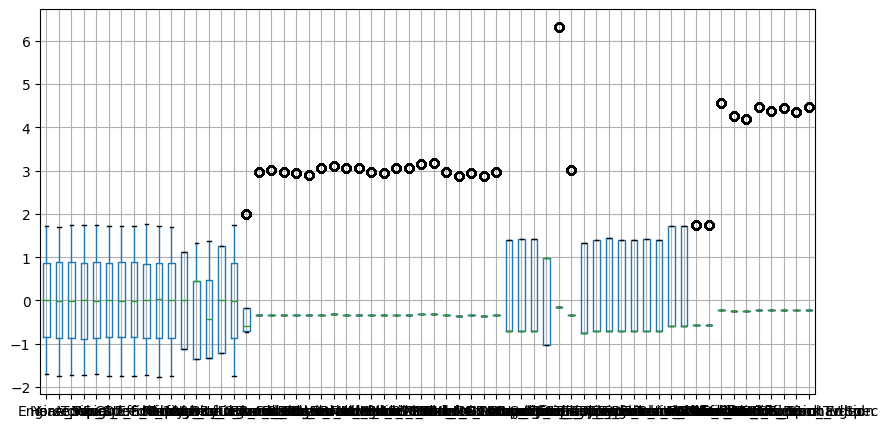

In [ ]:
#visualize distributions
plot_data_Standarization = pd.concat([data_Standardization])
plot_data_Standarization.boxplot(figsize=(10, 5))

<Axes: >

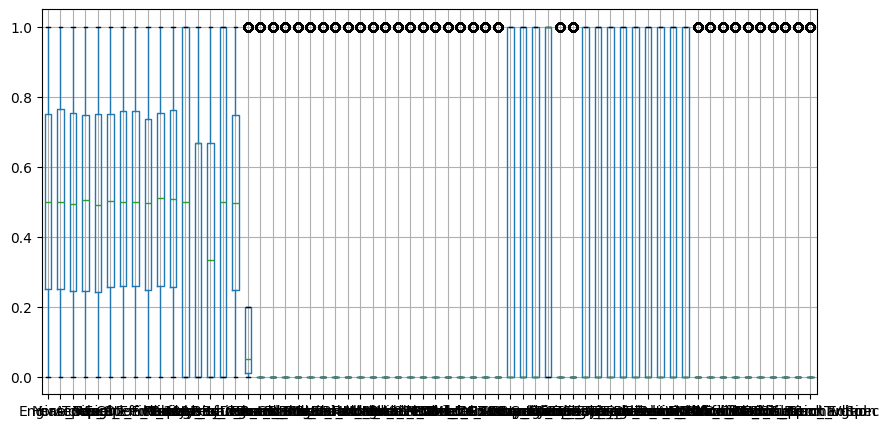

In [ ]:
#visualize distributions
plot_data_MinMax = pd.concat([data_MinMax])
plot_data_MinMax.boxplot(figsize=(10, 5))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<Axes: >

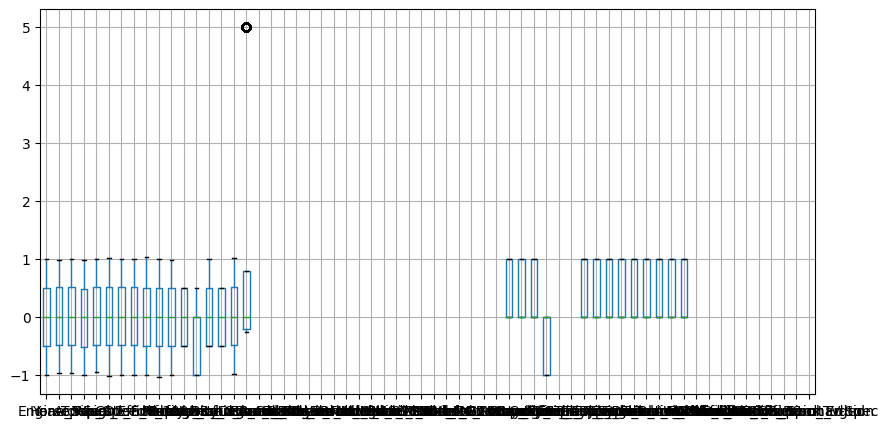

In [ ]:
#visualize distributions
plot_data_Robust = pd.concat([data_Robust])
plot_data_Robust.boxplot(figsize=(10, 5))

##6 and 7 PCA and Visual Representation

In [ ]:
y = data.pop('Price')

Text(0.5, 1.0, 'PCA')

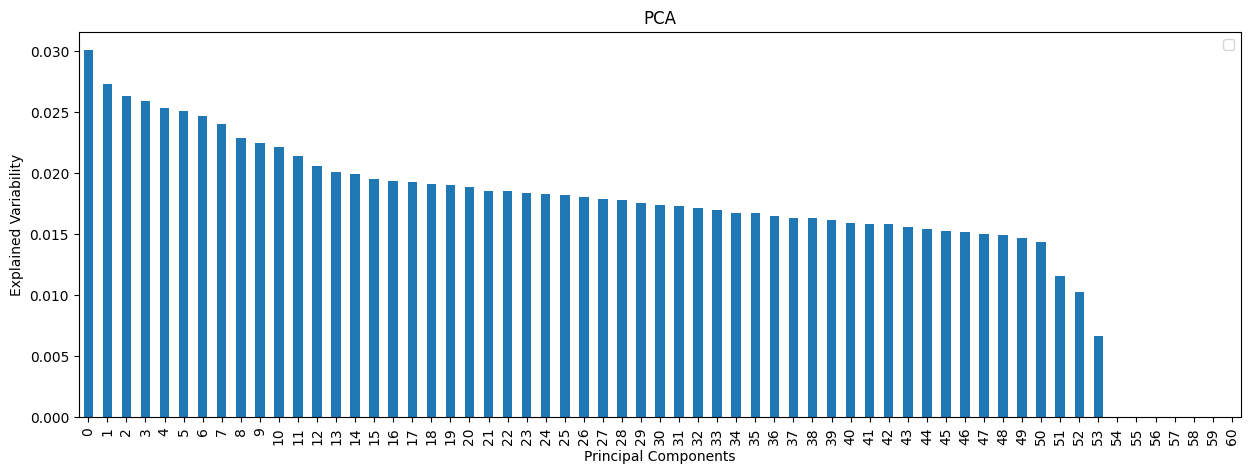

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scalar = StandardScaler()
data_scaled = pd.DataFrame(scalar.fit_transform(data),
columns=data.columns)
# %%
pca = PCA()
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))
# %%
pd.DataFrame(pca.explained_variance_ratio_).plot.bar(figsize=(15, 5))
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variability')
plt.title('PCA')
# %%


In [ ]:
pca.feature_names_in_

array(['Year', 'Engine_Size', 'Horsepower', 'Torque', 'Weight',
       'Top_Speed', 'Acceleration_0_100', 'Fuel_Efficiency',
       'CO2_Emissions', 'Mileage', 'Popularity', 'Safety_Rating',
       'Number_of_Owners', 'Market_Demand', 'Insurance_Cost',
       'Production_Units', 'Brand_Aston Martin', 'Brand_BMW',
       'Brand_Bugatti', 'Brand_Chevrolet', 'Brand_Ferrari', 'Brand_Ford',
       'Brand_Lamborghini', 'Brand_McLaren', 'Brand_Nissan',
       'Brand_Porsche', 'Model_488 GTB', 'Model_720S',
       'Model_911 Turbo S', 'Model_Chiron', 'Model_Corvette Z06',
       'Model_DBS', 'Model_GT-R', 'Model_Huracan', 'Model_M4 Competition',
       'Model_Mustang GT', 'Country_Asia', 'Country_Europe',
       'Country_USA', 'Condition_new', 'Condition_restored',
       'Condition_salvage', 'Condition_used', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_Petrol', 'Drivetrain_AWD',
       'Drivetrain_FWD', 'Drivetrain_RWD', 'Transmission_Automatic',
       'Transmission_CVT', 'Tr

In [ ]:
pca.explained_variance_ratio_

array([3.00519152e-02, 2.73093387e-02, 2.62991742e-02, 2.59077709e-02,
       2.52981847e-02, 2.50843541e-02, 2.47037242e-02, 2.39815362e-02,
       2.28543382e-02, 2.24738432e-02, 2.21609943e-02, 2.14058634e-02,
       2.05963083e-02, 2.01076914e-02, 1.98730364e-02, 1.95195845e-02,
       1.93364793e-02, 1.92185218e-02, 1.91098751e-02, 1.89951008e-02,
       1.88387686e-02, 1.85124090e-02, 1.84947908e-02, 1.83869891e-02,
       1.82816521e-02, 1.81917992e-02, 1.80066137e-02, 1.78294992e-02,
       1.77991516e-02, 1.75714927e-02, 1.73738749e-02, 1.72739154e-02,
       1.70974158e-02, 1.69851792e-02, 1.67481743e-02, 1.66861873e-02,
       1.65004993e-02, 1.63378948e-02, 1.63209901e-02, 1.61744425e-02,
       1.59196145e-02, 1.58389840e-02, 1.58115717e-02, 1.56014461e-02,
       1.53875203e-02, 1.52342237e-02, 1.51684526e-02, 1.50077153e-02,
       1.49014633e-02, 1.46793950e-02, 1.43477947e-02, 1.15178899e-02,
       1.02555694e-02, 6.62898490e-03, 8.71154955e-18, 5.12793661e-18,
      

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.03005192, 0.05736125, 0.08366043, 0.1095682 , 0.13486638,
       0.15995074, 0.18465446, 0.208636  , 0.23149034, 0.25396418,
       0.27612517, 0.29753104, 0.31812735, 0.33823504, 0.35810807,
       0.37762766, 0.39696414, 0.41618266, 0.43529253, 0.45428764,
       0.4731264 , 0.49163881, 0.5101336 , 0.52852059, 0.54680224,
       0.56499404, 0.58300066, 0.60083016, 0.61862931, 0.6362008 ,
       0.65357468, 0.67084859, 0.68794601, 0.70493119, 0.72167936,
       0.73836555, 0.75486605, 0.77120394, 0.78752493, 0.80369937,
       0.81961899, 0.83545797, 0.85126954, 0.86687099, 0.88225851,
       0.89749273, 0.91266119, 0.9276689 , 0.94257037, 0.95724976,
       0.97159756, 0.98311545, 0.99337102, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Text(0.5, 1.0, 'PCA')

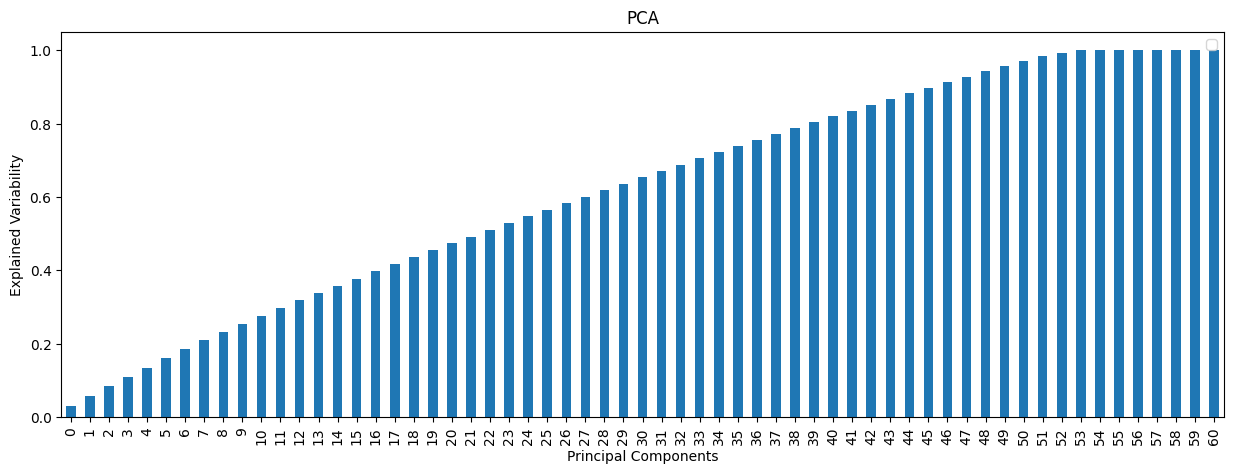

In [ ]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)).plot.bar(figsize=(15, 5))
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variability')
plt.title('PCA')

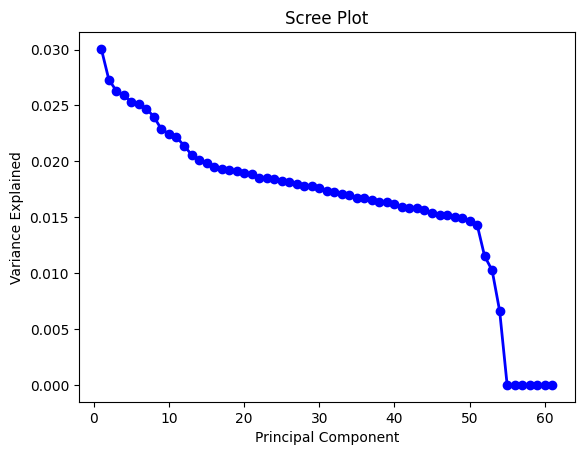

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()